# Import libraries

In [1]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Get city bbox

In [2]:
place_name = "Altstadt, Dresden, Germany"

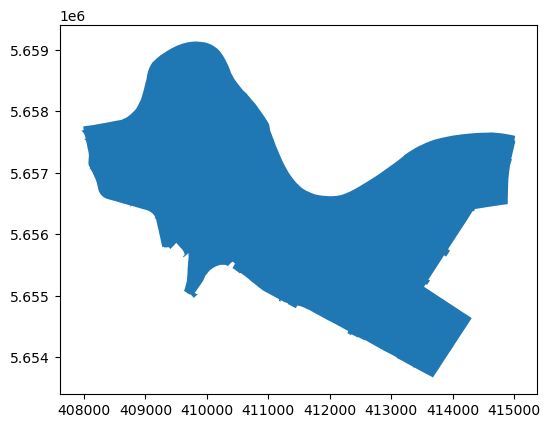

In [3]:
city = ox.geocode_to_gdf(place_name)
ax = ox.projection.project_gdf(city).plot()

In [4]:
# minx, miny, maxx, maxy (left, bottom, right, top)
city.total_bounds

array([13.6864402, 51.0280799, 13.7872926, 51.0766681])

In [5]:
city_bbox = [13.6864402, 51.0280799, 13.7872926, 51.0766681]

# Get green space area from OSM

## 1. Use landuse key

In [6]:
green_landuse_area = ox.features_from_bbox(city_bbox, 
                                           tags={'landuse': ['allotments',
                                                             'farmland',
                                                             'forest',
                                                             'grass',
                                                             'greenfield',
                                                             'meadow',
                                                             'orchard',
                                                             'recreation_ground',
                                                             'village_green',
                                                             'vineyard']})

<Axes: >

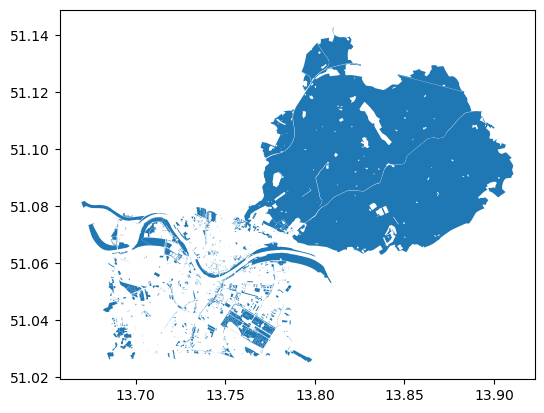

In [7]:
green_landuse_area.plot()

In [8]:
green_landuse_area = green_landuse_area.reset_index()

In [9]:
green_landuse_area.head()

element      id                                           geometry  \
0  relation    6128  MULTIPOLYGON (((13.89557 51.10721, 13.89696 51...   
1  relation  157942  POLYGON ((13.76618 51.04139, 13.76469 51.03996...   
2  relation  157943  POLYGON ((13.76701 51.04119, 13.76706 51.04117...   
3  relation  157944  POLYGON ((13.7594 51.03423, 13.7598 51.03418, ...   
4  relation  396375  POLYGON ((13.76482 51.03744, 13.76481 51.03743...   

  landuse            name area:highway old_name source addr:city addr:country  \
0  forest  Dresdner Heide          NaN      NaN    NaN       NaN          NaN   
1  forest             NaN          NaN      NaN    NaN       NaN          NaN   
2  forest             NaN          NaN      NaN    NaN       NaN          NaN   
3  forest             NaN          NaN      NaN    NaN       NaN          NaN   
4   grass             NaN          NaN      NaN    NaN       NaN          NaN   

   ... protect_class protection_title  ref short_protection_title crop fixme  \
0  ...           NaN              NaN  NaN                    NaN  NaN   NaN   
1  ...           NaN              NaN  NaN                    NaN  NaN   NaN   
2  ...           NaN              NaN  NaN                    NaN  NaN   NaN   
3  ...           NaN              NaN  NaN                    NaN  NaN   NaN   
4  ...           NaN              NaN  NaN                    NaN  NaN   NaN   

  level          type           name:hsb layer  
0   NaN  multipolygon  Drježdźanska hola   NaN  
1   NaN  multipolygon                NaN   NaN  
2   NaN  multipolygon                NaN   NaN  
3   NaN  multipolygon                NaN   NaN  
4   NaN  multipolygon                NaN   NaN  

[5 rows x 71 columns]

In [10]:
green_landuse_area.to_file("../data/raw/osm/green space/green_landuse_area.geojson", driver='GeoJSON')

In [11]:
# print(green_landuse_area[green_landuse_area['landuse']=='allotments'].iloc[0].values)

In [12]:
# green_landuse_area[~(green_landuse_area['barrier'].isna())]

In [13]:
# green_landuse_area[~(green_landuse_area['access'].isna())]['access']

## 2. Use leisure key

In [14]:
green_leisure_area = ox.features_from_bbox(city_bbox, 
                                           tags={'leisure': ['garden',
                                                             'golf_course',
                                                             'nature_reserve',
                                                             'park',
                                                             'pitch',
                                                             'playground']})

<Axes: >

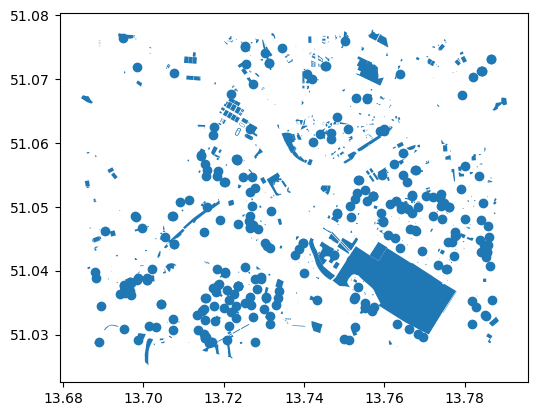

In [15]:
green_leisure_area.plot()

In [16]:
green_leisure_area = green_leisure_area.reset_index()

In [17]:
green_leisure_area.head()

element         id                   geometry   access     leisure  \
0    node  266593887   POINT (13.71519 51.0301)      yes  playground   
1    node  274970363  POINT (13.71997 51.03423)  private  playground   
2    node  280462694  POINT (13.76765 51.04634)      yes  playground   
3    node  289488035  POINT (13.75018 51.07594)      yes  playground   
4    node  313713718   POINT (13.75921 51.0491)      NaN       pitch   

                        name      opening_hours                  operator  \
0   Würzburger Straße - Park  Mo-Su 08:00-22:00  Landeshauptstadt Dresden   
1                        NaN                NaN                   Vonovia   
2                        NaN                NaN                       NaN   
3  Spielplatz Schanzenstraße                NaN                       NaN   
4                        NaN                NaN                       NaN   

  wheelchair         sport  ... garden:style name:de material pitch:net  \
0        NaN           NaN  ...          NaN     NaN      NaN       NaN   
1        yes           NaN  ...          NaN     NaN      NaN       NaN   
2        NaN           NaN  ...          NaN     NaN      NaN       NaN   
3        yes  table_tennis  ...          NaN     NaN      NaN       NaN   
4        NaN  table_tennis  ...          NaN     NaN      NaN       NaN   

  pitch:net:material pitch:net:overhang operator:short type contact:facebook  \
0                NaN                NaN            NaN  NaN              NaN   
1                NaN                NaN            NaN  NaN              NaN   
2                NaN                NaN            NaN  NaN              NaN   
3                NaN                NaN            NaN  NaN              NaN   
4                NaN                NaN            NaN  NaN              NaN   

  name:fr  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  

[5 rows x 91 columns]

In [18]:
green_leisure_area.to_file("../data/raw/osm/green space/green_leisure_area.geojson", driver='GeoJSON')

In [19]:
# tiles = "cartodbdarkmatter"
# green_leisure_area.explore(tiles=tiles, color="lime", tooltip="name")

In [20]:
# green_leisure_area[green_leisure_area['leisure']=='garden'].count()

In [21]:
# green_leisure_area[~(green_leisure_area['access'].isna())]['access'].unique()

## 3. Use natural key

In [22]:
green_natural_area = ox.features_from_bbox(city_bbox, 
                                           tags={'natural': ['wood',
                                                             'scrub',
                                                             'heath',
                                                             'grassland',
                                                             'wetland']})

<Axes: >

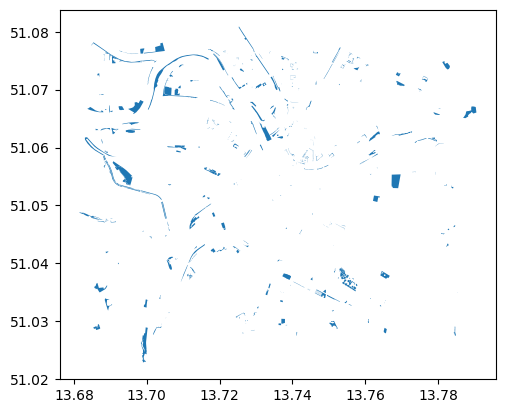

In [23]:
green_natural_area.plot()

In [24]:
green_natural_area = green_natural_area.reset_index()

In [25]:
green_natural_area.head()

element        id                                           geometry  \
0  relation    416763  POLYGON ((13.75248 51.03744, 13.75261 51.03758...   
1  relation   3169464  POLYGON ((13.74307 51.05855, 13.74299 51.05847...   
2  relation   5515461  POLYGON ((13.73346 51.03539, 13.7334 51.03524,...   
3  relation   7267976  POLYGON ((13.75354 51.03727, 13.75348 51.03731...   
4  relation  10735164  POLYGON ((13.76676 51.03784, 13.76637 51.03745...   

     natural attraction       name  name:cs species:de species:wikidata  \
0  grassland     animal  Mandrills  Mandril   Mandrill          Q189868   
1      scrub        NaN        NaN      NaN        NaN              NaN   
2  grassland        NaN        NaN      NaN        NaN              NaN   
3  grassland        NaN        NaN      NaN        NaN              NaN   
4       wood        NaN        NaN      NaN        NaN              NaN   

  wheelchair  ... level man_made description:de image landcover comment  \
0        NaN  ...   NaN      NaN            NaN   NaN       NaN     NaN   
1        NaN  ...   NaN      NaN            NaN   NaN       NaN     NaN   
2        NaN  ...   NaN      NaN            NaN   NaN       NaN     NaN   
3        NaN  ...   NaN      NaN            NaN   NaN       NaN     NaN   
4        NaN  ...   NaN      NaN            NaN   NaN       NaN     NaN   

  access  fee species:wikipedia          type  
0    NaN  NaN               NaN  multipolygon  
1    NaN  NaN               NaN  multipolygon  
2    NaN  NaN               NaN  multipolygon  
3    NaN  NaN               NaN  multipolygon  
4    NaN  NaN               NaN  multipolygon  

[5 rows x 32 columns]

In [26]:
green_natural_area.to_file("../data/raw/osm/green space/green_natural_area.geojson", driver='GeoJSON')

## 4. Use tourism key

In [27]:
green_campsite_area = ox.features_from_bbox(city_bbox, 
                                            tags={'tourism': ['camp_site',
                                                              'picnic_site']})

<Axes: >

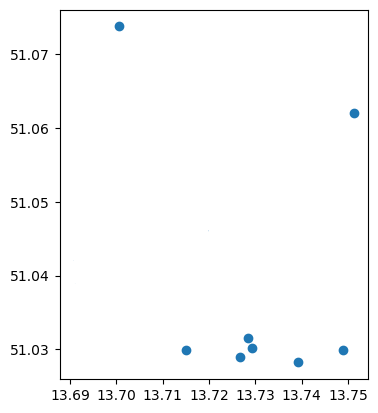

In [28]:
green_campsite_area.plot()

In [29]:
green_campsite_area = green_campsite_area.reset_index()

In [30]:
green_campsite_area.head()

element          id                   geometry      tourism shelter seats  \
0    node  3128780402  POINT (13.74884 51.02996)  picnic_site     NaN   NaN   
1    node  3163118403   POINT (13.7284 51.03152)  picnic_site      no   NaN   
2    node  3806645587  POINT (13.72925 51.03019)  picnic_site      no   NaN   
3    node  4352882229  POINT (13.71503 51.02999)  picnic_site     NaN   NaN   
4    node  4888415416  POINT (13.72658 51.02899)  picnic_site     NaN    20   

  covered access addr:city addr:housenumber addr:postcode addr:street  
0     NaN    NaN       NaN              NaN           NaN         NaN  
1     NaN    NaN       NaN              NaN           NaN         NaN  
2     NaN    NaN       NaN              NaN           NaN         NaN  
3     NaN    NaN       NaN              NaN           NaN         NaN  
4     NaN    NaN       NaN              NaN           NaN         NaN

In [31]:
green_campsite_area.to_file("../data/raw/osm/green space/green_campsite_area.geojson", driver='GeoJSON')

# Get POI from OSM

## 1. Use amenity key

In [32]:
poi_amenity_gdf = ox.features_from_bbox(city_bbox, 
                                        tags={'amenity': ['bench',
                                                          'waste_basket']})

<Axes: >

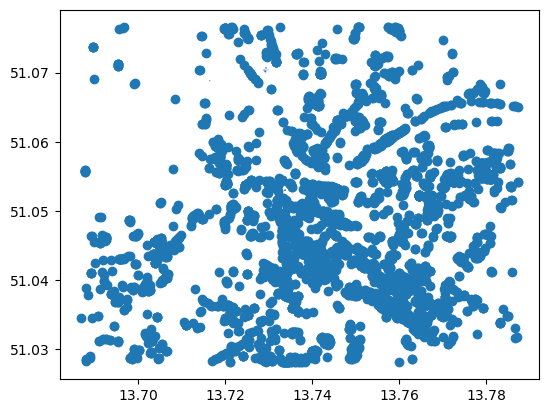

In [33]:
poi_amenity_gdf.plot()

In [34]:
poi_amenity_gdf = poi_amenity_gdf.reset_index()

In [35]:
poi_amenity_gdf.head()

element         id                   geometry       amenity backrest  \
0    node  255925960  POINT (13.70218 51.03911)  waste_basket      NaN   
1    node  266687099  POINT (13.70123 51.03841)         bench      yes   
2    node  304869266  POINT (13.74573 51.05307)         bench      yes   
3    node  304869267  POINT (13.74575 51.05313)         bench      yes   
4    node  304869268  POINT (13.74573 51.05319)         bench      yes   

   check_date material covered colour seats  ... wikidata  lit bench:type  \
0         NaN      NaN     NaN    NaN   NaN  ...      NaN  NaN        NaN   
1         NaN      NaN     NaN    NaN   NaN  ...      NaN  NaN        NaN   
2  2021-08-13      NaN     NaN    NaN   NaN  ...      NaN  NaN        NaN   
3  2021-08-13      NaN     NaN    NaN   NaN  ...      NaN  NaN        NaN   
4  2021-08-13      NaN     NaN    NaN   NaN  ...      NaN  NaN        NaN   

  vending access operator deposit_ring leisure barrier man_made  
0     NaN    NaN      NaN          NaN     NaN     NaN      NaN  
1     NaN    NaN      NaN          NaN     NaN     NaN      NaN  
2     NaN    NaN      NaN          NaN     NaN     NaN      NaN  
3     NaN    NaN      NaN          NaN     NaN     NaN      NaN  
4     NaN    NaN      NaN          NaN     NaN     NaN      NaN  

[5 rows x 49 columns]

In [36]:
poi_amenity_gdf.to_file("../data/raw/osm/amenity/poi_amenity.geojson", driver='GeoJSON')

## 2. Use leisure key

In [37]:
poi_leisure_gdf = ox.features_from_bbox(city_bbox, 
                                        tags={'leisure': ['picnic_table',
                                                          'playground']})

<Axes: >

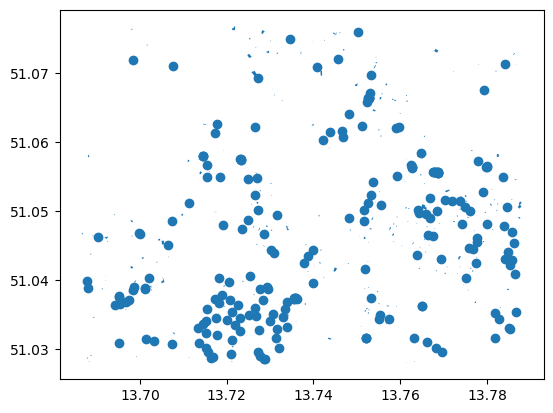

In [38]:
poi_leisure_gdf.plot()

In [39]:
poi_leisure_gdf = poi_leisure_gdf.reset_index()

In [40]:
poi_leisure_gdf.head()

element         id                   geometry     access     leisure  \
0    node  266593887   POINT (13.71519 51.0301)        yes  playground   
1    node  274970363  POINT (13.71997 51.03423)    private  playground   
2    node  280462694  POINT (13.76765 51.04634)        yes  playground   
3    node  289488035  POINT (13.75018 51.07594)        yes  playground   
4    node  372545516  POINT (13.78181 51.03163)  customers  playground   

                        name      opening_hours                  operator  \
0   Würzburger Straße - Park  Mo-Su 08:00-22:00  Landeshauptstadt Dresden   
1                        NaN                NaN                   Vonovia   
2                        NaN                NaN                       NaN   
3  Spielplatz Schanzenstraße                NaN                       NaN   
4                        NaN                NaN                       NaN   

  wheelchair         sport  ... image capacity fence_type fixme addr:country  \
0        NaN           NaN  ...   NaN      NaN        NaN   NaN          NaN   
1        yes           NaN  ...   NaN      NaN        NaN   NaN          NaN   
2        NaN           NaN  ...   NaN      NaN        NaN   NaN          NaN   
3        yes  table_tennis  ...   NaN      NaN        NaN   NaN          NaN   
4        NaN           NaN  ...   NaN      NaN        NaN   NaN          NaN   

  contact:email contact:mobile contact:website level type  
0           NaN            NaN             NaN   NaN  NaN  
1           NaN            NaN             NaN   NaN  NaN  
2           NaN            NaN             NaN   NaN  NaN  
3           NaN            NaN             NaN   NaN  NaN  
4           NaN            NaN             NaN   NaN  NaN  

[5 rows x 53 columns]

In [41]:
poi_leisure_gdf.to_file("../data/raw/osm/amenity/poi_leisure.geojson", driver='GeoJSON')

In [42]:
# poi_leisure_gdf.loc[poi_leisure_gdf.geometry.geometry.type=='Point']

## 3. Use barrier key

barrier=gate and barrier=entrace to help classify public/private area

In [43]:
poi_barrier_gdf = ox.features_from_bbox(city_bbox, 
                                        tags={'barrier': ['gate',
                                                          'entrance']})

In [44]:
poi_barrier_gdf.head()

geometry   access barrier locked bicycle  \
element id                                                                     
node    26750550   POINT (13.75855 51.07052)  private    gate    NaN     NaN   
        26848700   POINT (13.69262 51.06327)      NaN    gate    NaN     NaN   
        91515286   POINT (13.72201 51.05366)      NaN    gate    NaN     NaN   
        104550850  POINT (13.70749 51.07216)      NaN    gate    NaN     NaN   
        104605769  POINT (13.72437 51.06617)      NaN    gate    NaN     NaN   

                  foot material wheelchair created_by motor_vehicle  ...  \
element id                                                           ...   
node    26750550   NaN      NaN        NaN        NaN           NaN  ...   
        26848700   NaN      NaN        NaN        NaN           NaN  ...   
        91515286   NaN      NaN        NaN        NaN           NaN  ...   
        104550850  NaN      NaN        NaN        NaN           NaN  ...   
        104605769  NaN      NaN        NaN        NaN           NaN  ...   

                  railway:signal:position start_date amenity maxlength  \
element id                                                               
node    26750550                      NaN        NaN     NaN       NaN   
        26848700                      NaN        NaN     NaN       NaN   
        91515286                      NaN        NaN     NaN       NaN   
        104550850                     NaN        NaN     NaN       NaN   
        104605769                     NaN        NaN     NaN       NaN   

                  maxheight colour note:access door operator fixme  
element id                                                          
node    26750550        NaN    NaN         NaN  NaN      NaN   NaN  
        26848700        NaN    NaN         NaN  NaN      NaN   NaN  
        91515286        NaN    NaN         NaN  NaN      NaN   NaN  
        104550850       NaN    NaN         NaN  NaN      NaN   NaN  
        104605769       NaN    NaN         NaN  NaN      NaN   NaN  

[5 rows x 69 columns]

In [45]:
poi_barrier_gdf = poi_barrier_gdf.reset_index()

In [46]:
poi_barrier_gdf.to_file("../data/raw/osm/amenity/poi_barrier.geojson", driver='GeoJSON')

# Get road network, cycleway, and footpath

## 1. Get road network

In [47]:
# road_network_gdf = ox.features_from_bbox(city_bbox, 
#                                          tags={'highway': ['primary',
#                                                            'secondary',
#                                                            'tertiary',
#                                                            'residential']})

In [48]:
# road_network_gdf.plot()

In [49]:
# road_network_gdf = road_network_gdf.reset_index()

In [50]:
# road_network_gdf.head()

In [51]:
# road_network_gdf.to_file("../data/raw/osm/network/road_network.geojson", driver='GeoJSON')

In [52]:
road_network = ox.graph_from_bbox(city_bbox, network_type='drive')

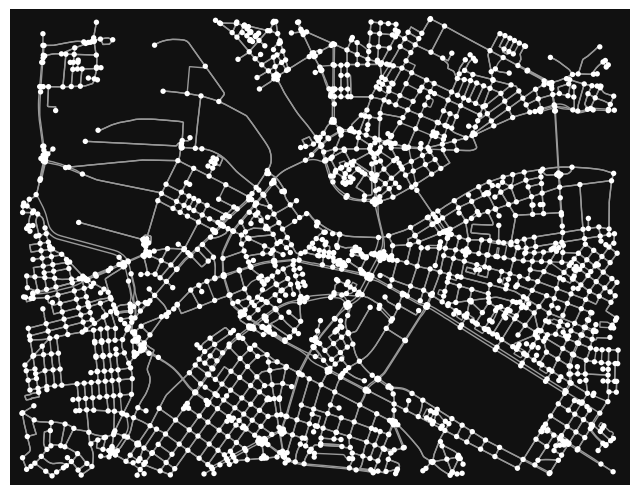

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [53]:
ox.plot_graph(road_network)

In [54]:
nodes, edges = ox.graph_to_gdfs(road_network)

In [55]:
m = edges.explore(color="skyblue", tiles="cartodbdarkmatter")
nodes.explore(m=m, color="pink", marker_kwds={"radius": 6})

In [56]:
nodes = nodes.reset_index()
edges = edges.reset_index()

In [57]:
edges.head()

u         v  key                                              osmid  \
0  534608  30436919    0                                          762891172   
1  534622    534608    0                  [762904347, 250470755, 762904351]   
2  534624    534622    0  [762876705, 762876706, 31822598, 762904349, 76...   
3  534625  30436908    0                                          152651376   
4  534625    534624    0                              [30559972, 309474893]   

     highway   lanes maxspeed                                    name  oneway  \
0   tertiary       4       50                         Ackermannstraße   False   
1  secondary  [3, 2]       50                          Zellescher Weg    True   
2  secondary  [3, 2]       50                          Zellescher Weg    True   
3    primary       4       50                    Fritz-Foerster-Platz    True   
4  secondary       2       50  [Fritz-Foerster-Platz, Zellescher Weg]    True   

  reversed      length    ref  \
0    False   12.554889    NaN   
1    False  204.274998  S 172   
2    False  814.363141  S 172   
3    False   17.695123  B 170   
4    False   56.362990  S 172   

                                            geometry access width junction  \
0  LINESTRING (13.74584 51.02841, 13.74591 51.02852)    NaN   NaN      NaN   
1  LINESTRING (13.74296 51.02871, 13.74322 51.028...    NaN   NaN      NaN   
2  LINESTRING (13.73151 51.02975, 13.73168 51.029...    NaN   NaN      NaN   
3  LINESTRING (13.73085 51.03005, 13.73083 51.03021)    NaN   NaN      NaN   
4  LINESTRING (13.73085 51.03005, 13.73106 51.029...    NaN   NaN      NaN   

  bridge tunnel est_width  
0    NaN    NaN       NaN  
1    NaN    NaN       NaN  
2    NaN    NaN       NaN  
3    NaN    NaN       NaN  
4    NaN    NaN       NaN

In [58]:
nodes.head()

osmid          y          x  street_count highway railway junction  ref  \
0  534608  51.028413  13.745844             4     NaN     NaN      NaN  NaN   
1  534622  51.028714  13.742964             3     NaN     NaN      NaN  NaN   
2  534624  51.029753  13.731508             3     NaN     NaN      NaN  NaN   
3  534625  51.030047  13.730852             4     NaN     NaN      NaN  NaN   
4  534626  51.029457  13.730978             3     NaN     NaN      NaN  NaN   

                    geometry  
0  POINT (13.74584 51.02841)  
1  POINT (13.74296 51.02871)  
2  POINT (13.73151 51.02975)  
3  POINT (13.73085 51.03005)  
4  POINT (13.73098 51.02946)

In [59]:
edges['highway'].dtype

dtype('O')

Note: there is the case that highway or other attribute values is *'list'* due to topology clean-up of osmnx

In [60]:
nodes.to_file("../data/raw/osm/network/road network/road_network_nodes.geojson", driver='GeoJSON')
edges.to_file("../data/raw/osm/network/road network/road_network_edges.geojson", driver='GeoJSON')

In [61]:
# nodes['junction'].unique()

## 2. Get cycleway

In [62]:
cycle_network = ox.graph_from_bbox(city_bbox, network_type='bike')

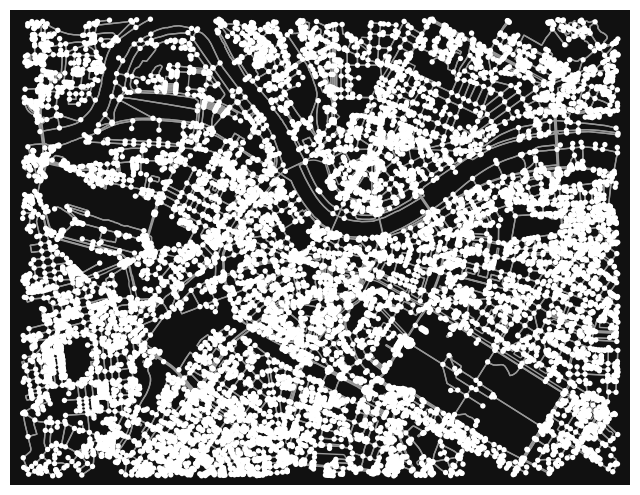

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [63]:
ox.plot_graph(cycle_network)

In [64]:
cycle_nodes, cycle_edges = ox.graph_to_gdfs(cycle_network)

In [65]:
cycle_nodes = cycle_nodes.reset_index()
cycle_edges = cycle_edges.reset_index()

In [66]:
cycle_nodes.head()

osmid          y          x  street_count highway railway junction  ref  \
0  534608  51.028413  13.745844             5     NaN     NaN      NaN  NaN   
1  534622  51.028714  13.742964             3     NaN     NaN      NaN  NaN   
2  534624  51.029753  13.731508             3     NaN     NaN      NaN  NaN   
3  534625  51.030047  13.730852             4     NaN     NaN      NaN  NaN   
4  534626  51.029457  13.730978             3     NaN     NaN      NaN  NaN   

                    geometry  
0  POINT (13.74584 51.02841)  
1  POINT (13.74296 51.02871)  
2  POINT (13.73151 51.02975)  
3  POINT (13.73085 51.03005)  
4  POINT (13.73098 51.02946)

In [67]:
cycle_edges.head()

u           v  key                   osmid       highway   lanes  \
0  534608    30436919    0               762891172      tertiary       4   
1  534608   371857221    0               496200351     secondary       2   
2  534608   365507697    0               762891171  unclassified       1   
3  534622  5642109774    0                     110   residential     NaN   
4  534622  7128758478    0  [250470755, 762904351]     secondary  [3, 2]   

  maxspeed                   name  oneway reversed  ...    ref  \
0       50        Ackermannstraße   False    False  ...    NaN   
1       50         Zellescher Weg    True    False  ...  S 172   
2       50         Paradiesstraße    True    False  ...    NaN   
3       50  Heinrich-Greif-Straße   False    False  ...    NaN   
4       50         Zellescher Weg    True    False  ...  S 172   

                                            geometry access width junction  \
0  LINESTRING (13.74584 51.02841, 13.74591 51.02852)    NaN   NaN      NaN   
1  LINESTRING (13.74584 51.02841, 13.74587 51.028...    NaN   NaN      NaN   
2  LINESTRING (13.74584 51.02841, 13.74581 51.028...    NaN   NaN      NaN   
3  LINESTRING (13.74296 51.02871, 13.74295 51.028...    NaN   NaN      NaN   
4  LINESTRING (13.74296 51.02871, 13.74322 51.028...    NaN   NaN      NaN   

  bridge service tunnel est_width area  
0    NaN     NaN    NaN       NaN  NaN  
1    NaN     NaN    NaN       NaN  NaN  
2    NaN     NaN    NaN       NaN  NaN  
3    NaN     NaN    NaN       NaN  NaN  
4    NaN     NaN    NaN       NaN  NaN  

[5 rows x 21 columns]

Note: there is the case that highway or other attribute values is *'list'* due to topology clean-up of osmnx

In [68]:
cycle_nodes.to_file("../data/raw/osm/network/cycle network/cycle_network_nodes.geojson", driver='GeoJSON')
cycle_edges.to_file("../data/raw/osm/network/cycle network/cycle_network_edges.geojson", driver='GeoJSON')

## 3. Get footpath

In [69]:
footpath_network = ox.graph_from_bbox(city_bbox, network_type='walk')

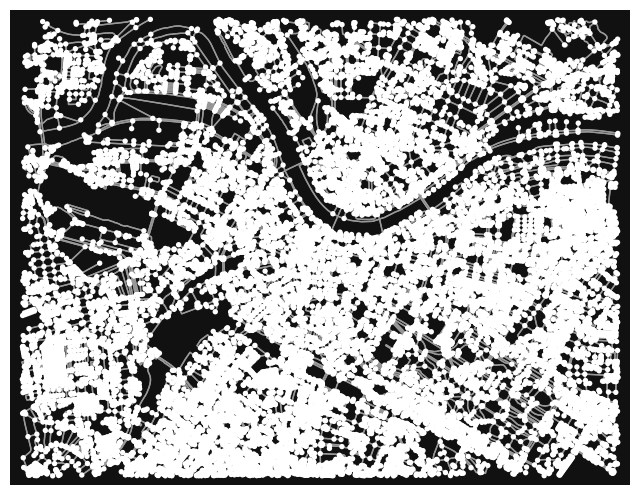

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [70]:
ox.plot_graph(footpath_network)

In [71]:
footpath_nodes, footpath_edges = ox.graph_to_gdfs(footpath_network)

In [72]:
footpath_nodes = footpath_nodes.reset_index()
footpath_edges = footpath_edges.reset_index()

In [73]:
footpath_nodes.head()

osmid          y          x  street_count highway railway  ref junction  \
0  534608  51.028413  13.745844             5     NaN     NaN  NaN      NaN   
1  534622  51.028714  13.742964             3     NaN     NaN  NaN      NaN   
2  534629  51.034382  13.731250             1     NaN     NaN  NaN      NaN   
3  534630  51.032257  13.741843             5     NaN     NaN  NaN      NaN   
4  534632  51.030495  13.742312             4     NaN     NaN  NaN      NaN   

                    geometry  
0  POINT (13.74584 51.02841)  
1  POINT (13.74296 51.02871)  
2  POINT (13.73125 51.03438)  
3  POINT (13.74184 51.03226)  
4   POINT (13.74231 51.0305)

In [74]:
footpath_edges.head()

u          v  key      osmid       highway lanes maxspeed  \
0  534608   30436919    0  762891172      tertiary     4       50   
1  534608  371857221    0  496200351     secondary     2       50   
2  534608  367835353    0  762891166  unclassified     2       50   
3  534608  365507697    0  762891171  unclassified     1       50   
4  534608  371857211    0  762904347     secondary     3       50   

              name  oneway reversed  ...    ref  \
0  Ackermannstraße   False    False  ...    NaN   
1   Zellescher Weg   False    False  ...  S 172   
2   Paradiesstraße   False     True  ...    NaN   
3   Paradiesstraße   False    False  ...    NaN   
4   Zellescher Weg   False     True  ...  S 172   

                                            geometry access width service  \
0  LINESTRING (13.74584 51.02841, 13.74591 51.02852)    NaN   NaN     NaN   
1  LINESTRING (13.74584 51.02841, 13.74587 51.028...    NaN   NaN     NaN   
2  LINESTRING (13.74584 51.02841, 13.74585 51.028...    NaN   NaN     NaN   
3  LINESTRING (13.74584 51.02841, 13.74581 51.028...    NaN   NaN     NaN   
4  LINESTRING (13.74584 51.02841, 13.74582 51.028...    NaN   NaN     NaN   

  bridge junction tunnel est_width area  
0    NaN      NaN    NaN       NaN  NaN  
1    NaN      NaN    NaN       NaN  NaN  
2    NaN      NaN    NaN       NaN  NaN  
3    NaN      NaN    NaN       NaN  NaN  
4    NaN      NaN    NaN       NaN  NaN  

[5 rows x 21 columns]

Note: there is the case that highway or other attribute values is *'list'* due to topology clean-up of osmnx

In [75]:
footpath_nodes.to_file("../data/raw/osm/network/footpath network/footpath_network_nodes.geojson", driver='GeoJSON')
footpath_edges.to_file("../data/raw/osm/network/footpath network/footpath_network_edges.geojson", driver='GeoJSON')

# Test getting path density/path length of each polygon

In [76]:
green_landuse_area_utm = green_landuse_area.to_crs(32632)

In [77]:
green_landuse_area_utm['total_area'] = green_landuse_area_utm.area

In [78]:
green_landuse_area_utm['geometry'].count()

2352

In [79]:
green_landuse_area_utm[green_landuse_area_utm['total_area'] > 100]['geometry'].count()

1713

In [80]:
green_landuse_area_utm_filter = green_landuse_area_utm[green_landuse_area_utm['total_area'] > 100]

MultiPolygon


/root/miniforge3/envs/pugs-detection-new/lib/python3.12/site-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


{'n': 1806, 'm': 5392, 'k_avg': 5.971207087486158, 'edge_length_total': 660296.9224488719, 'edge_length_avg': 122.4586280506068, 'streets_per_node_avg': 3.111295681063123, 'streets_per_node_counts': {0: 0, 1: 159, 2: 0, 3: 1170, 4: 441, 5: 30, 6: 6}, 'streets_per_node_proportions': {0: 0.0, 1: 0.08803986710963455, 2: 0.0, 3: 0.6478405315614618, 4: 0.2441860465116279, 5: 0.016611295681063124, 6: 0.0033222591362126247}, 'intersection_count': 1647, 'street_length_total': 330148.4612244366, 'street_segment_count': 2696, 'street_length_avg': 122.45862805060705, 'circuity_avg': 1.041389569612538, 'self_loop_proportion': 0.000741839762611276}


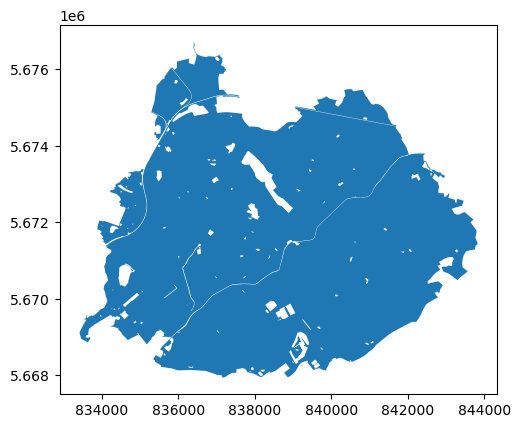

In [81]:
for index, row in green_landuse_area_utm_filter.iterrows():
    print(row['geometry'].geom_type)
    if 'Polygon' in row['geometry'].geom_type:
        green_landuse_area_utm_filter[green_landuse_area_utm_filter['geometry'] == row['geometry']].plot()
        latlng_geom, _ = ox.projection.project_geometry(row['geometry'], crs={'init':'epsg:32632'}, to_latlong=True)
        temp_graph = ox.graph_from_polygon(latlng_geom, network_type='walk')
        stats = ox.basic_stats(temp_graph)
        print(stats)
        break